In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import random
from glob import glob
import matplotlib.image as img
import zipfile


In [ ]:
print(tf.__version__)

2.16.1


In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
TRAINING_DIR = 'Dataset/dataset_train_augmented'
TEST_DIR = 'Dataset/dataset_test_augmented'

Data for A is 800
Data for B is 800
Data for C is 800
Data for D is 800
Data for E is 800
Data for F is 800
Data for G is 800
Data for H is 800
Data for I is 800
Data for J is 800
Data for K is 800
Data for L is 800
Data for M is 800
Data for N is 800
Data for O is 800
Data for P is 800
Data for Q is 800
Data for R is 800
Data for S is 800
Data for T is 800
Data for U is 800
Data for V is 800
Data for W is 800
Data for X is 800
Data for Y is 800
Data for Z is 800

Total 20800


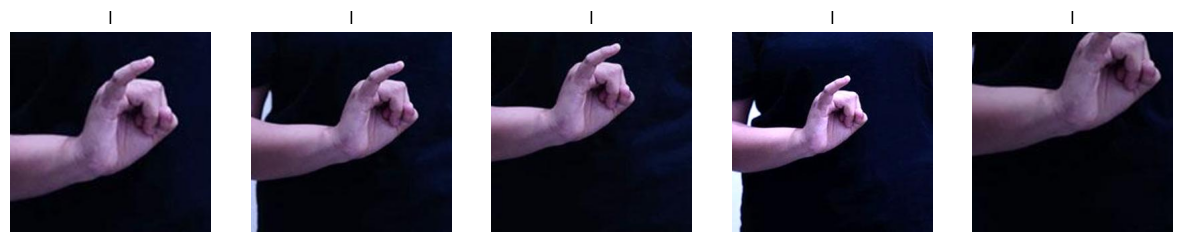

In [ ]:
%matplotlib inline

import cv2
import os
import random
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

number_of_rows = 1
number_of_columns = 5

total = 0
dir_names=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

for file in dir_names:
    dir = os.listdir(f"{TEST_DIR}/{file}")
    total += len(dir)
    print(f"Data for {file} is {len(dir)}")

print(f"\nTotal {total}")

random.seed(13)

category = random.choice(dir_names)

plt.figure(figsize=(15, 5))

for i in range(number_of_columns):
    subplot = plt.subplot(number_of_rows, number_of_columns, i + 1)
    subplot.axis('Off')
    subplot.set_title(category)
    image_name = random.choice(os.listdir(os.path.join(TEST_DIR, category)))
    image_path = os.path.join(TEST_DIR, category, image_name)
    image = mpimg.imread(image_path)
    plt.imshow(image)

plt.show()


In [ ]:
# Preparing ImageDataGenerator object for training the model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = 200
BATCH_SIZE = 64

data_generator = ImageDataGenerator(
    samplewise_center=True,
    samplewise_std_normalization=True,
    brightness_range=[0.8, 1.0],
    zoom_range=[1.0, 1.2],
    validation_split=0.1
)

train_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="training")

validation_generator = data_generator.flow_from_directory(TRAINING_DIR, target_size=(IMAGE_SIZE, IMAGE_SIZE), shuffle=True, seed=13,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

Found 18720 images belonging to 26 classes.
Found 2080 images belonging to 26 classes.


In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /content/drive/MyDrive/Signary/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5


--2024-06-11 14:29:49--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 142.250.99.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/content/drive/MyDrive/Signary/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/content/drive/MyDr 100%[===================>]  83.84M  61.8MB/s    in 1.4s    

2024-06-11 14:29:51 (61.8 MB/s) - ‘/content/drive/MyDrive/Signary/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



# InceptionV3

In [ ]:
# Loading inception v3 network for transfer learning
from tensorflow.keras.applications.inception_v3 import InceptionV3

WEIGHTS_FILE = 'Dataset/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inception_v3_model = InceptionV3(
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    include_top=False,
    weights='imagenet'
)

# Not required --> inception_v3_model.load_weights(WEIGHTS_FILE)

# Enabling the top 2 inception blocks to train
for layer in inception_v3_model.layers[:249]:
    layer.trainable = False
for layer in inception_v3_model.layers[249:]:
    layer.trainable = True

# Checking model summary to pick a layer (if required)
inception_v3_model.summary()


Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_376 (Conv2D)           │ (None, 99, 99, 32)        │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_376       │ (None, 99, 99, 32)        │              96 │ conv2d_376[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_376 (Activation)   │ (None, 99, 99, 32)        │               0 │ batch_normalization_376[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_377 (Conv2D)           │ (None, 97, 97, 32)        │           9,216 │ activation_376[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_377       │ (None, 97, 97, 32)        │              96 │ conv2d_377[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_377 (Activation)   │ (None, 97, 97, 32)        │               0 │ batch_normalization_377[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_378 (Conv2D)           │ (None, 97, 97, 64)        │          18,432 │ activation_377[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_378       │ (None, 97, 97, 64)        │             192 │ conv2d_378[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_378 (Activation)   │ (None, 97, 97, 64)        │               0 │ batch_normalization_378[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_16              │ (None, 48, 48, 64)        │               0 │ activation_378[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_379 (Conv2D)           │ (None, 48, 48, 80)        │           5,120 │ max_pooling2d_16[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_379       │ (None, 48, 48, 80)        │             240 │ conv2d_379[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_379 (Activation)   │ (None, 48, 48, 80)        │               0 │ batch_normalization_379[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_380 (Conv2D)           │ (None, 46, 46, 192)       │         138,24

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 11,114,880 (42.40 MB)

 Non-trainable params: 10,687,904 (40.77 MB)

In [ ]:
output_layer = inception_v3_model.get_layer('mixed7')
inception_output = output_layer.output

In [ ]:
from tensorflow.keras.optimizers import Adam

x = tf.keras.layers.GlobalAveragePooling2D()(inception_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(26, activation='softmax')(x)

model = Model(inception_v3_model.input, x)

# Choose an optimizer (example using Adam optimizer)
optimizer = Adam(learning_rate=1e-3)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)


In [ ]:

# Watch the new model summary
model.summary()


Model: "functional_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_376 (Conv2D)           │ (None, 99, 99, 32)        │             864 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_376       │ (None, 99, 99, 32)        │              96 │ conv2d_376[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_376 (Activation)   │ (None, 99, 99, 32)        │               0 │ batch_normalization_376[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_377 (Conv2D)           │ (None, 97, 97, 32)        │           9,216 │ activation_376[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_377       │ (None, 97, 97, 32)        │              96 │ conv2d_377[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_377 (Activation)   │ (None, 97, 97, 32)        │               0 │ batch_normalization_377[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_378 (Conv2D)           │ (None, 97, 97, 64)        │          18,432 │ activation_377[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_378       │ (None, 97, 97, 64)        │             192 │ conv2d_378[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_378 (Activation)   │ (None, 97, 97, 64)        │               0 │ batch_normalization_378[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_16              │ (None, 48, 48, 64)        │               0 │ activation_378[0][0]       │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_379 (Conv2D)           │ (None, 48, 48, 80)        │           5,120 │ max_pooling2d_16[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_379       │ (None, 48, 48, 80)        │             240 │ conv2d_379[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_379 (Activation)   │ (None, 48, 48, 80)        │               0 │ batch_normalization_379[0… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_380 (Conv2D)           │ (None, 46, 46, 192)       │         138,24

 Total params: 9,789,370 (37.34 MB)

 Trainable params: 814,106 (3.11 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [ ]:
# Creating a callback to stop model training after reaching a threshold accuracy

LOSS_THRESHOLD = 0.3
ACCURACY_THRESHOLD = 0.9
class ModelCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_loss') < LOSS_THRESHOLD and logs.get('val_acc') > ACCURACY_THRESHOLD:
      print("\nReached", ACCURACY_THRESHOLD * 100, "accuracy, Stopping!")
      self.model.stop_training = True

callback = ModelCallback()

In [ ]:
LOSS_THRESHOLD = 0.3
ACCURACY_THRESHOLD = 0.9

class ModelCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_loss') < LOSS_THRESHOLD and logs.get('val_accuracy') > ACCURACY_THRESHOLD:
            print("\nReached", ACCURACY_THRESHOLD * 100, "accuracy, Stopping!")
            self.model.stop_training = True

callback = ModelCallback()


In [ ]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=50,
    epochs=50,
    callbacks=[callback]
)

Epoch 1/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 160s 540ms/step - accuracy: 0.9638 - loss: 0.1118 - val_accuracy: 0.9163 - val_loss: 0.3266
Epoch 2/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 161s 541ms/step - accuracy: 0.9650 - loss: 0.1143 - val_accuracy: 0.9192 - val_loss: 0.3071
Epoch 3/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 164s 551ms/step - accuracy: 0.9681 - loss: 0.1036 - val_accuracy: 0.9202 - val_loss: 0.3170
Epoch 4/50
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step - accuracy: 0.9671 - loss: 0.1036
Reached 90.0 accuracy, Stopping!
293/293 ━━━━━━━━━━━━━━━━━━━━ 165s 554ms/step - accuracy: 0.9671 - loss: 0.1036 - val_accuracy: 0.9260 - val_loss: 0.2818


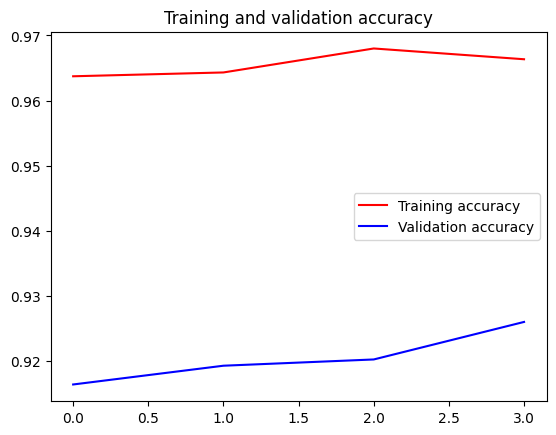

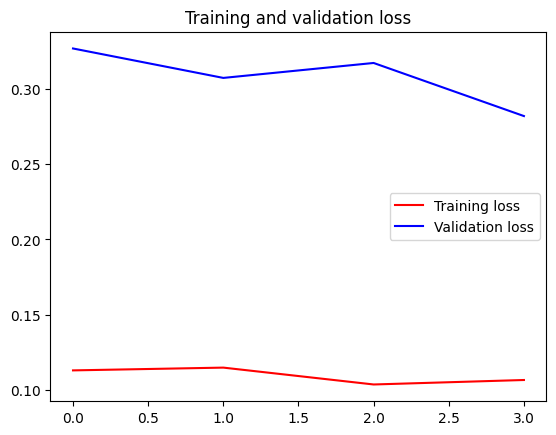

<Figure size 640x480 with 0 Axes>

In [ ]:
# Accessing training and validation metrics from the History object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
from tensorflow.keras.models import save_model

MODEL_NAME = 'Dataset/models/signaryyRevised.h5'.format(9575)
save_model(model, MODEL_NAME)


In [ ]:
# Define the list of class names (directory names)
classes = os.listdir(TEST_DIR)
classes.sort()


# Iterate over each class (category)
for i, category in enumerate(classes):
    # Get the first image from the current category
    image_names = os.listdir(os.path.join(TEST_DIR, category))
    if not image_names:
        print(f"No images found in category: {category}")
        continue
    image_name = image_names[0]
    image_path = os.path.join(TEST_DIR, category, image_name)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Failed to load image: {image_name}")
        continue  # Skip to the next image if loading fails

    img = cv2.resize(img, (200, 200))  # Resize the image to match model input size

    # Display the image
    plt.figure(figsize=(15, 5))
    plt.axis('Off')
    plt.imshow(img)

    # Prepare the image for prediction
    img = np.array(img) / 255.
    img = img.reshape((1, 200, 200, 3))  # Ensure the image shape matches model input
    img = data_generator.standardize(img)

    # Make prediction
    prediction = np.array(model.predict(img))
    predicted = classes[prediction.argmax()]

    # Extract actual class from image name
    actual = image_name.split('_')[0]

    print('Actual class: {} \nPredicted class: {}'.format(actual, predicted))
    plt.show()


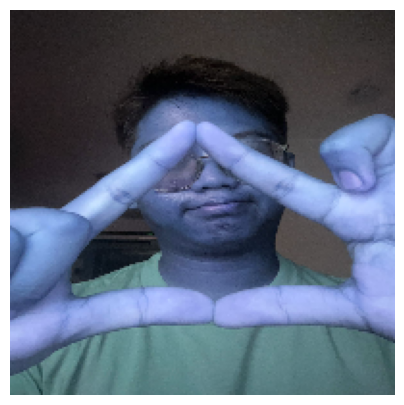

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted class: A


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Define the list of class names (directory names)
classes = os.listdir(TEST_DIR)
classes.sort()

# Function to predict uploaded image
def predict_uploaded_image(image_path):
    # Read the uploaded image
    img = cv2.imread(image_path)

    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    # Resize the image to match model input size
    img = cv2.resize(img, (200, 200))

    # Display the image
    plt.figure(figsize=(5, 5))
    plt.axis('Off')
    plt.imshow(img)
    plt.show()

    # Prepare the image for prediction
    img = np.array(img) / 255.
    img = img.reshape((1, 200, 200, 3))  # Ensure the image shape matches model input
    img = data_generator.standardize(img)

    # Make prediction
    prediction = np.array(model.predict(img))
    predicted = classes[prediction.argmax()]

    print('Predicted class:', predicted)

# Example usage:
# Provide the path to the image file you want to predict
image_file_path = 'Dataset/tesA.jpeg'
predict_uploaded_image(image_file_path)
